## **Load the Preprocessed Data**

First, you need to import the required libraries and load the `preprocessed_data.csv` file that you saved earlier.

In [1]:
import pandas as pd
import numpy as np

# Load the preprocessed data
new_data = pd.read_csv(r"E:/Random Python Scripts/CICIDS/CICIDS2017/preprocessed_data.csv")

## **Creating a balanced dataset for Multi-Class Classification**

The following dataset is highly imbalanced, we took the help of **SMOTE (Synthetic Minority Over-sampling Technique)** to upsample the minority classes while creating a balanced dataset for multi-class classification. This helped us in creating an overall balanced dataset to feed the classification models.

In [2]:
new_data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

Ensures a more balanced dataset by controlling the number of samples per class.

In [3]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

Attack Type
BENIGN         5000
DoS            5000
DDoS           5000
Port Scan      5000
Brute Force    5000
Web Attack     2143
Bot            1953
Name: count, dtype: int64

Combines the upsampled features and labels into a new DataFrame (`blnc_data`).

In [4]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

Attack Type
DoS            5000
BENIGN         5000
Bot            5000
DDoS           5000
Brute Force    5000
Port Scan      5000
Web Attack     5000
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(blnc_data['Attack Type'])

# Feature Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(blnc_data.drop('Attack Type', axis=1))

In [7]:
from sklearn.model_selection import train_test_split

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=0)

In [5]:
'''
from sklearn.model_selection import train_test_split

features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

X_train.shape
'''

# **Dense Neural Network (DNN)**

## **Multi-Class Classification**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [14]:
# Assuming y_train is a numpy array
num_classes = len(np.unique(y_train))
num_classes

7

In [15]:
# Define the model

'''
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(y_train.nunique(), activation='softmax')  # Softmax for multi-class classification
])

'''
# Define the model
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Use num_classes for the output layer
])

In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

In [28]:
# Train the model
history = model.fit(X_train, y_train, 
                    validation_split=0.1, 
                    epochs=50, 
                    batch_size=512, 
                    verbose=1)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1059 - sparse_categorical_accuracy: 0.9682 - val_loss: 0.8651 - val_sparse_categorical_accuracy: 0.6846
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1053 - sparse_categorical_accuracy: 0.9692 - val_loss: 1.1360 - val_sparse_categorical_accuracy: 0.5204
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1029 - sparse_categorical_accuracy: 0.9680 - val_loss: 2.1863 - val_sparse_categorical_accuracy: 0.4229
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1079 - sparse_categorical_accuracy: 0.9684 - val_loss: 1.1305 - val_sparse_categorical_accuracy: 0.7048
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0976 - sparse_categorical_accuracy: 0.9717 - val_loss: 0.5607 - val_sparse_categorical_accuracy: 0.8469
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0941 - sparse_categorical_accuracy: 0.9718 - val_loss: 1.3796 - val_sparse_categorical_accuracy: 0.5722
Epoch 7/50

In [19]:
# Save the model
model.save("DNN_MC.h5")
print("Model saved successfully.")

Model saved successfully.


# **Performance Evaluation**

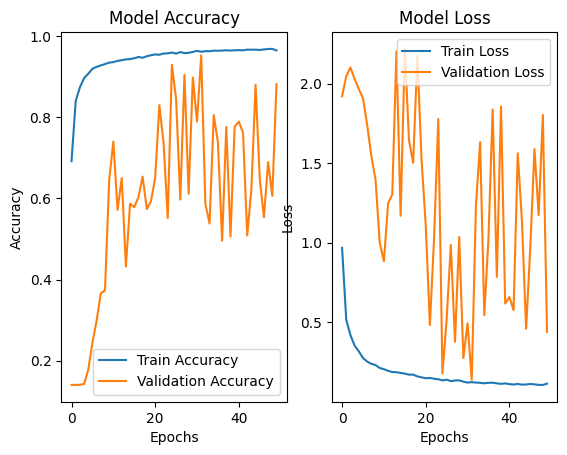

In [20]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate classification report
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
print(classification_report(y_test, y_pred_classes))

Test Accuracy: 0.87
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1235
           1       0.92      0.38      0.54      1311
           2       0.99      0.97      0.98      1209
           3       0.99      0.99      0.99      1214
           4       0.95      0.98      0.96      1273
           5       0.59      1.00      0.74      1311
           6       0.96      0.98      0.97      1197

    accuracy                           0.87      8750
   macro avg       0.91      0.88      0.87      8750
weighted avg       0.91      0.87      0.87      8750

